# Bike Sharing Demand Prediction Project

This notebook presents a complete workflow for predicting daily bike rental demand using multiple linear regression. It covers data loading, quality checks, feature engineering, variable selection, model building, evaluation, and interpretation.

In [ ]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

Missing values per column:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Number of duplicate rows: 0


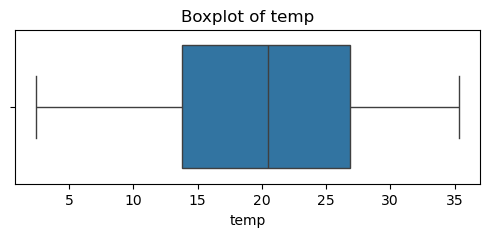

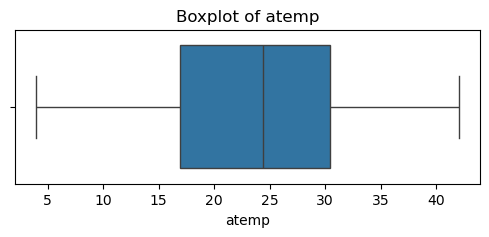

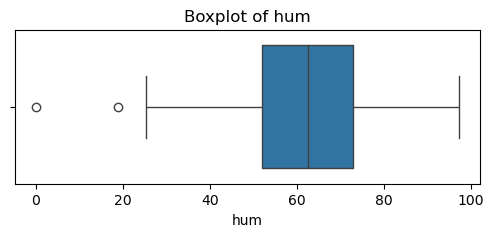

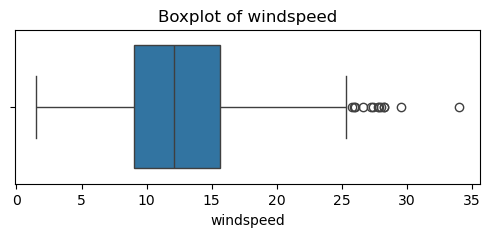

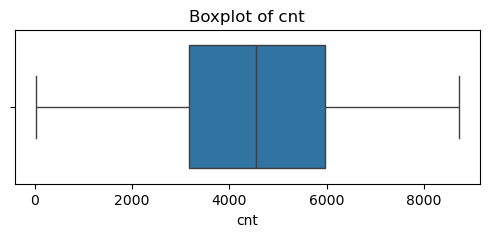

In [3]:
# 2. Load Dataset and Perform Initial Data Quality Checks

df = pd.read_csv('Bike Sharing Dataset.csv')

# Data quality checks
print('Missing values per column:')
print(df.isnull().sum())
print('\nNumber of duplicate rows:', df.duplicated().sum())

# Remove duplicates if any
if df.duplicated().sum() > 0:
    df = df.drop_duplicates()
    print('Duplicates removed.')

# Check for outliers in numerical columns
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
for col in num_cols:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Data Preparation and Feature Engineering
- Categorical variables (`season`, `weathersit`) are mapped to string labels and one-hot encoded.
- Unnecessary columns (`instant`, `dteday`, `casual`, `registered`) are dropped.
- New metric `is_weekend` is derived to capture weekend effects.
- Data is cleaned and formatted for modeling.

In [5]:
# Feature engineering and encoding
# Map season and weathersit to categorical labels
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weather_map = {1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}
df['season'] = df['season'].map(season_map)
df['weathersit'] = df['weathersit'].map(weather_map)
df['season'] = df['season'].astype('category')
df['weathersit'] = df['weathersit'].astype('category')

# Derive new metric: is_weekend
# 0 = Sunday, 6 = Saturday
# Assumption: weekday column uses 0 for Sunday, 6 for Saturday
# This helps analyze demand patterns on weekends vs weekdays
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x in [0,6] else 0)

# Drop unnecessary columns
df_model = df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

# One-hot encode categorical variables
df_model = pd.get_dummies(df_model, drop_first=True)

# Variable Selection and Multicollinearity Check
- Correlation analysis and VIF are used to select relevant variables and check for multicollinearity.
- Only variables with reasonable correlation and low VIF are retained for modeling.

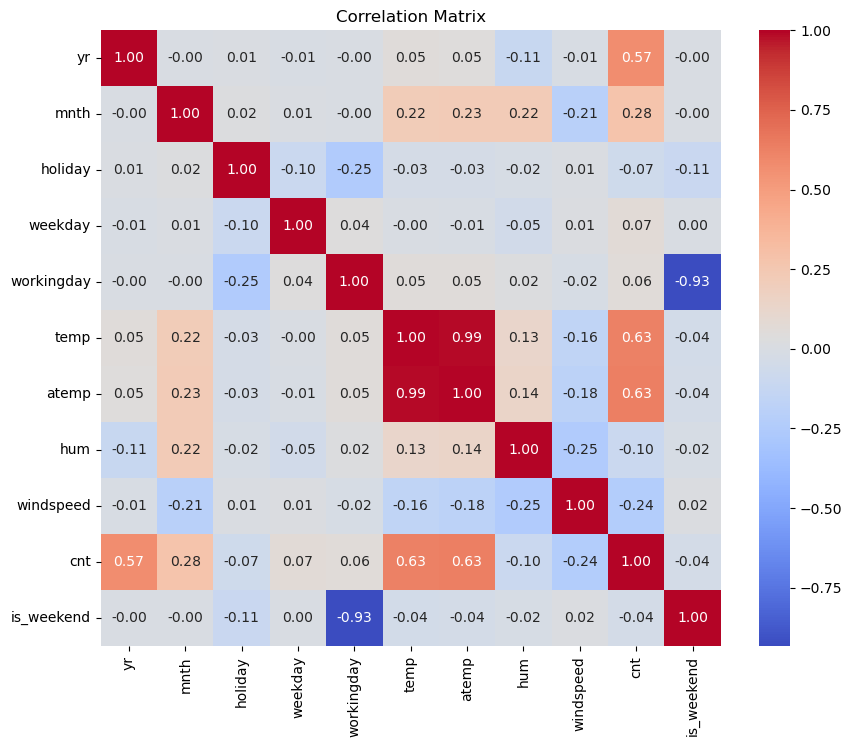

      feature        VIF
0          yr   1.018426
1        mnth   1.120252
2     holiday   2.371181
3     weekday   1.017655
4  workingday  36.275591
5        temp  63.198517
6       atemp  63.911359
7         hum   1.131429
8   windspeed   1.147986
9  is_weekend  15.674618


In [6]:
# Correlation analysis for variable selection
corr_matrix = df_model.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Check VIF for multicollinearity
X = df_model.drop('cnt', axis=1)
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

# Model Building and Evaluation
- Data is split into train and test sets.
- Multiple linear regression model is built and evaluated using R-squared.
- Model assumptions are validated using residual analysis.

In [7]:
# Split data into train and test sets
y = df_model['cnt']
X = df_model.drop('cnt', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build and train the model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# R-squared score
r2 = r2_score(y_test, y_pred)
print('R-squared score on test set:', r2)

R-squared score on test set: 0.7577915545256638


# Residual Analysis and Model Assumptions
- Residuals are analyzed for normality, homoscedasticity, and independence.
- Plots include residual distribution and residuals vs predicted values.

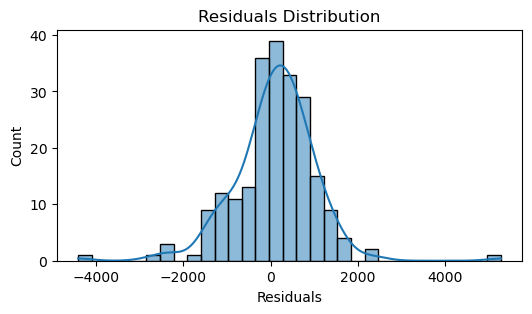

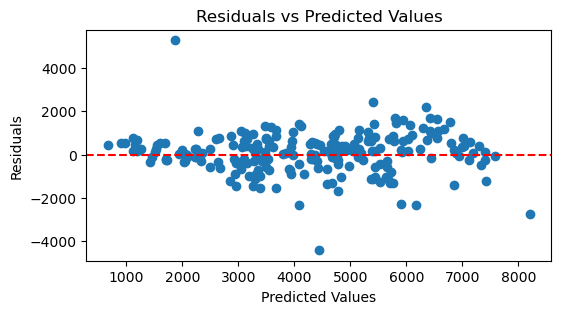

In [9]:
# Residual analysis
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(6,3))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.show()


# Plot residuals vs predicted values for homoscedasticity
plt.figure(figsize=(6,3))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Model Interpretation and Business Insights
- The model identifies significant predictors of bike demand.
- R-squared and residual analysis confirm model reliability.
- Management can use these insights to optimize operations and meet customer needs.

**Assumptions:**
- The dataset is clean and representative of the business scenario.
- Weekend effects are captured by the `is_weekend` variable.
- Linear relationships are sufficient for prediction.